Nama : An Nada Z Nabila <br>
NIM : 211351017 <br>
Kelas : Malam A

1. ***IMPORT DATASET***

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"annadaznabila","key":"119b7d56c3a3a0839dce126c4a750b80"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [3]:
!kaggle datasets download -d sujithmandala/easiest-diabetes-classification-dataset

  0% 0.00/1.06k [00:00<?, ?B/s]
100% 1.06k/1.06k [00:00<00:00, 1.69MB/s]


In [4]:
!mkdir easiest-diabetes-classification-dataset
!unzip easiest-diabetes-classification-dataset
!ls easiest-diabetes-classification-dataset

Archive:  easiest-diabetes-classification-dataset.zip
  inflating: Diabetes Classification.csv  


2. ***LIBRARY YANG DIGUNAKAN***

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree
import pickle

3. ***DATA DISCOVERY***

In [6]:
df = pd.read_csv('/content/Diabetes Classification.csv')

In [7]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,Male,25,Normal,100,5.7,No,No,Healthy,Regular,No
1,55,Female,30,High,120,6.4,Yes,Yes,Poor,No,Yes
2,65,Male,35,High,140,7.1,Yes,Yes,Poor,No,Yes
3,75,Female,40,High,160,7.8,Yes,Yes,Poor,No,Yes
4,40,Male,20,Normal,80,5.0,No,No,Healthy,Regular,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         128 non-null    int64  
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  128 non-null    object 
 7   Smoking                     128 non-null    object 
 8   Diet                        128 non-null    object 
 9   Exercise                    128 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(1), int64(3), object(7)
memory usage: 11.1+ KB


In [9]:
df.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [10]:
df.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,128.000000,128.000000,128.000000
mean,42.031250,35.359375,162.500000,7.887500
std,16.783915,14.981739,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,28.000000,24.000000,120.000000,6.400000
50%,40.000000,34.000000,160.000000,7.800000
75%,55.000000,45.500000,205.000000,9.375000
max,75.000000,67.000000,280.000000,12.000000


In [11]:
df['BMI'].value_counts()

25    7
30    7
35    7
15    6
34    6
29    6
24    6
19    6
40    5
20    5
39    5
59    4
54    4
49    4
44    4
14    3
10    3
42    3
37    3
17    3
27    3
32    3
22    3
67    2
62    2
52    2
57    2
65    2
60    2
55    2
50    2
45    2
64    2
47    2
Name: BMI, dtype: int64

In [12]:
df['Diagnosis'].value_counts()

No     97
Yes    31
Name: Diagnosis, dtype: int64

4.***EDA (Exploratory Data Analysis)***

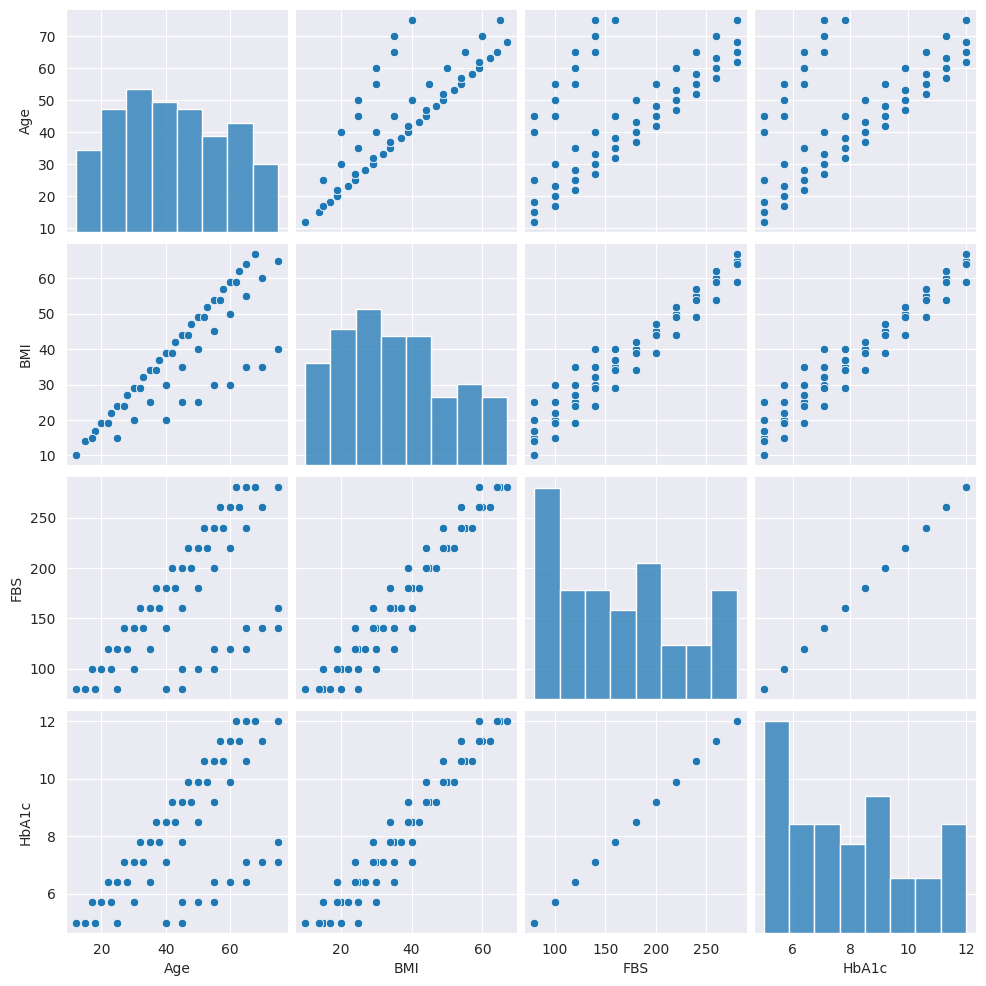

In [13]:
sns.set_style(style='darkgrid')
sns.pairplot(df)
plt.show()

Pairplot digunakan memberikan gambar visual tentang seberapa kuat korelasi antar variabel dan melihat distribusi variabel secara individual

Text(0.5, 1.0, 'Correlation Map')

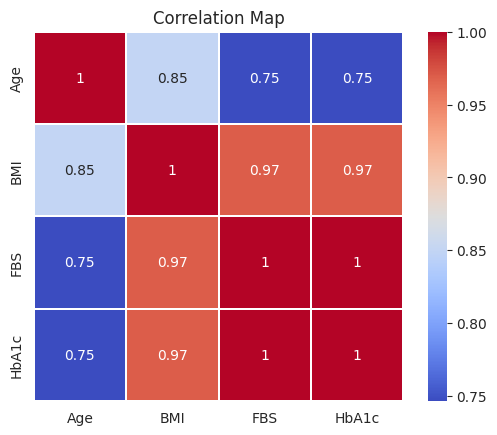

In [14]:
sns.heatmap(df.corr(numeric_only=True), linewidths=0.1, vmax=1.0, square=True, cmap='coolwarm', linecolor='white', annot=True).set_title("Correlation Map")

heatmap korelasi membantu visualisasi hubungan antar variabel dataset. Warna dan nilai nya di dalam setiap set mencerminkan tingkat korelasi antar variabel.

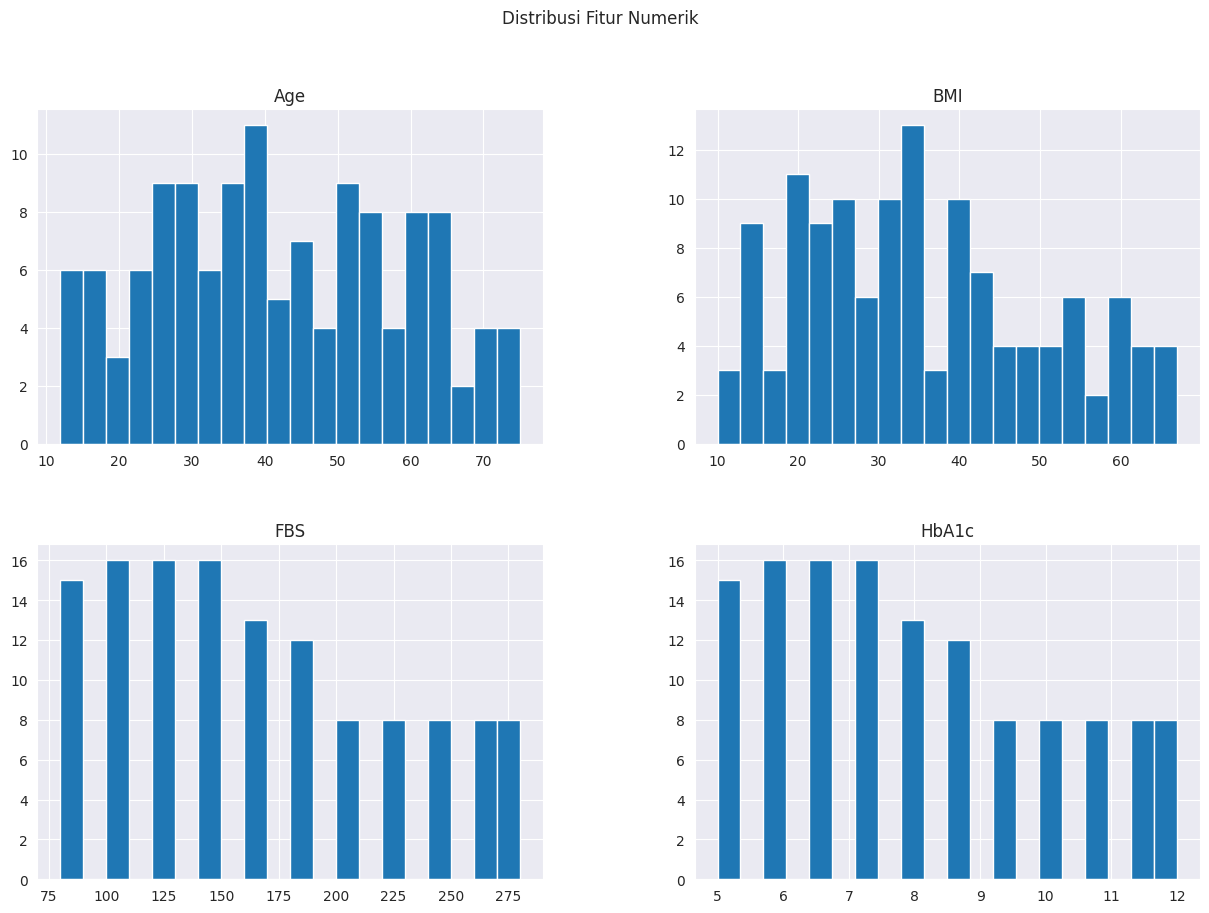

In [15]:
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribusi Fitur Numerik')
plt.show()

Histogram menggambarkan distribusi dari setiap fitur numerik dalam dataframe. Dan memberikan gambaran visual tentang frekuensi nilai nilai dalam setiap fitur.Data di atas seperti AGe,BMI,FBS,dan HbA1c merupakan kolom numerik atau dataframe yang memiliki data numerik.

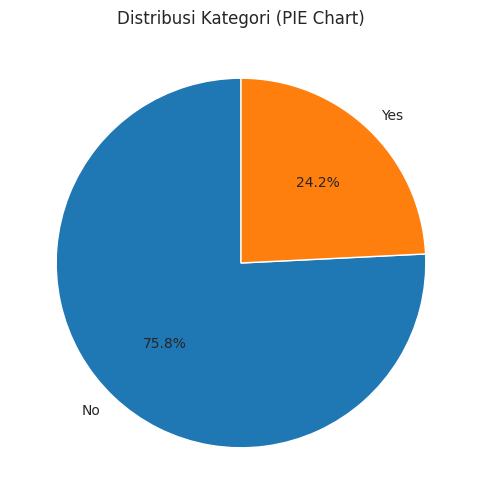

In [16]:
df = pd.read_csv('/content/Diabetes Classification.csv')
kategori_counts = df['Diagnosis'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(kategori_counts, labels=kategori_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribusi Kategori (PIE Chart)')
plt.show()

Membuat PIE Chart dalam menghitung frekuensi setiap kategori pada kolom 'Diagnosis' dan menyimpannya dalam kategori. Data diatas menghasilkan bahwa yang terkena diagnosis sebanyak 24,2% sedangkan yang tidak terkena diagnosis 75,8%.

Text(0.5, 1.0, 'Distribusi BMI')

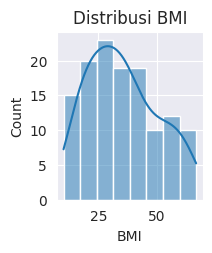

In [17]:
plt.subplot(2, 3, 6)
sns.histplot(df['BMI'], kde=True)
plt.title('Distribusi BMI')

Digunakan untuk membuat subplot pada grid yang ditentukan dan menambahkan distribusi'BMI' menggunakan seaborn



5. ***PREPROCESSING***

transformasi umur : <br>
Anak-anak :0-12 tahun <br>
Remaja :13-18 tahun <br>
Dewasa:19-60 tahun<br>
Lansia :>60

In [18]:
bins = [0, 12, 18, 60, float('inf')]
labels = ['Anak-anak', 'Remaja', 'Dewasa', 'Lansia']

df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

transformasi nilai BMI: <br>
Kurus : 0-18.5 <br>
Normal :18.6-24.9 <br>
Gemuk :25-29.9 <br>
Obesitas :>30

In [19]:
bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Kurus', 'Normal', 'Gemuk', 'Obesitas']

df['BMI'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

In [20]:
df=df.drop(['FBS'],axis=1)

In [21]:
numerical = []
catgcol = []

In [22]:
for col in df.columns:
  if df[col].dtype=='float64':
    numerical.append(col)
  else:
    catgcol.append(col)

for col in df.columns:
  if col in numerical:
    df[col].fillna(df[col].median(), inplace=True)
  else:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [23]:
if 'HbA1c' in numerical:
    print('HbA1c is in the list of numerical values.')
else:
    print('HbA1c is not in the list of numerical values.')

HbA1c is in the list of numerical values.


In [24]:
catgcol

['Age',
 'Gender',
 'BMI',
 'Blood Pressure',
 'Family History of Diabetes',
 'Smoking',
 'Diet',
 'Exercise',
 'Diagnosis']

Mentransformasi Data

In [25]:
le = LabelEncoder()

for col in catgcol:
  df[col] = le.fit_transform(df[col])

In [26]:
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

In [27]:
ind_col = [col for col in df.columns if col!= 'Diagnosis']
dep_col = 'Diagnosis'

In [28]:
x = df[ind_col]
y = df[dep_col]

In [29]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

6. ***MODELING***

In [30]:
dtc = DecisionTreeClassifier(criterion='entropy',max_depth=5)
dtc.fit(x_train, y_train)

model = model = dtc.fit(x_train, y_train)
dtc_acc= accuracy_score(y_test,dtc.predict(x_test))

print("Train Set Accuracy:"+str(accuracy_score(y_train,dtc.predict(x_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,dtc.predict(x_test))*100))
print(f'confusion matrix: \n{confusion_matrix(y_test, dtc.predict(x_test))}\n')
confusion = confusion_matrix(y_test, dtc.predict(x_test))
tn, fp, fn, tp = confusion.ravel()
print(f'classification report: {classification_report(y_test, dtc.predict(x_test))}')

Train Set Accuracy:99.01960784313727
Test Set Accuracy:92.3076923076923
confusion matrix: 
[[18  2]
 [ 0  6]]

classification report:               precision    recall  f1-score   support

           0       1.00      0.90      0.95        20
           1       0.75      1.00      0.86         6

    accuracy                           0.92        26
   macro avg       0.88      0.95      0.90        26
weighted avg       0.94      0.92      0.93        26



In [31]:
input_data = (0,1,0,2,4.6,0,0,0,1)

input_data_as_numpy_array = np.array(input_data)

input_data_reshape = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshape)
print(prediction)

if (prediction[0]==0):
    print ('Pasien di diagnosa tidak mengidap diabetes')
else:
    print ('Pasien di diagnosa mengidap diabetes')

[0]
Pasien di diagnosa tidak mengidap diabetes


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


7.***VISUALISASI POHON***

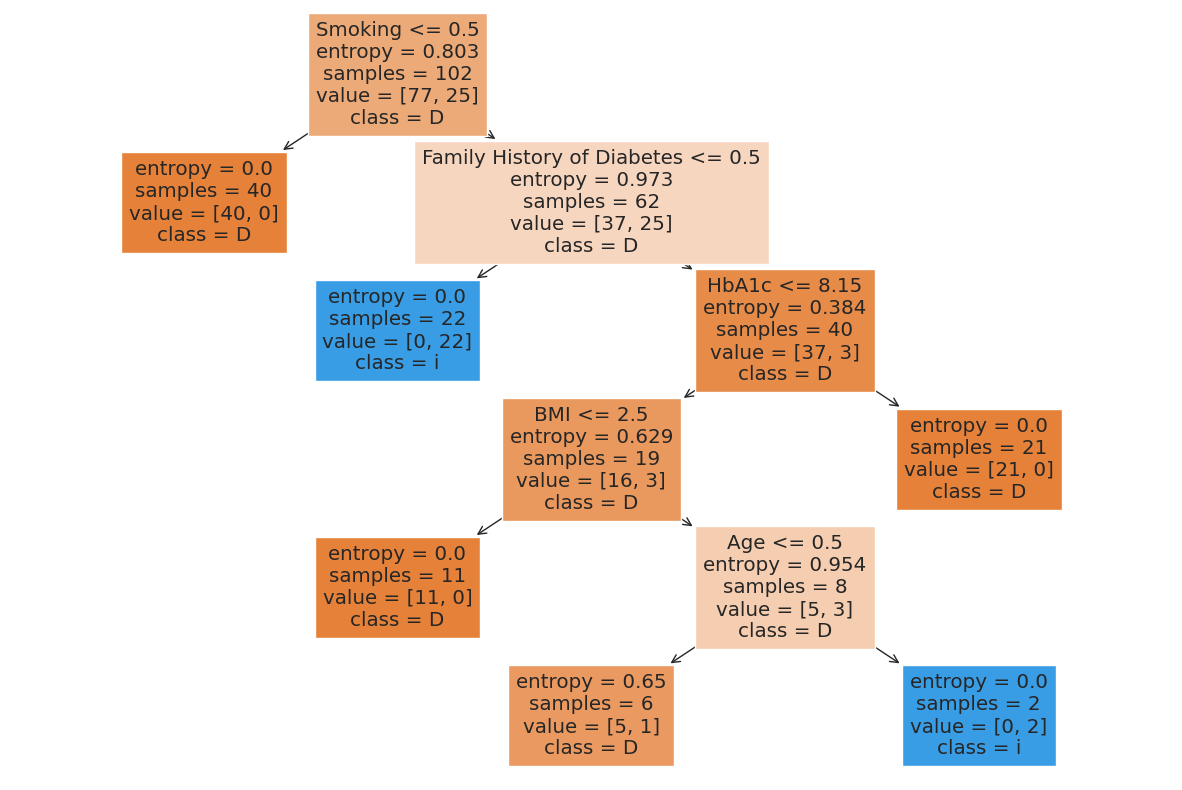

In [32]:
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model,
                   feature_names=ind_col,
                   class_names=dep_col,
                   filled=True)

In [33]:
fig.savefig("decision_tree.png")

8.***SAVE MODEL PICKLE***

In [34]:
filename ='Classification Diabetes.sav'
pickle.dump(model, open(filename, 'wb'))